## CS6650 Homework 1 (Holi 2023 Semester)
#### Smartphone based Photoplethysmography (PPG)
The task is to develop a PPG system using a smartphone device to capture blood flow related imagery data and post-process such data to estimate the pulse or heart beat rate of the subject. You need to implement various features pertaining to the above task in this notebook. Create a directory, <b><your_roll>_CS6650H23</b>. Place this notebook in that directory.

#### A. Warmup - Data Collection [10 points]
Use your smartphone’s camera to capture the blood-flow video. Turn on the flash while recording and turn it off once done. Capture the video using the maximum frame rate that is available in your phone (e.g.60 fps or 30 fps). The same holds for image resolution. The captured videos are saved on the device’s SD card. Collect 3 such videos (each exactly 10 seconds long, if longer just limit to N frames while processing, where N = 10*frames_per_second) under the following conditions. Make sure that all video capture configurations are kept the same across the cases (resolution, fps).
* resting on bed (1.mp4)
* after a moderate walk (2.mp4), and
* after a vigorous exercise (3.mp4).

Copy these videos locally to your project folder in a subdirectory "ppgvideos" - name them (1/2/3).mp4. Don’t move your finger/hand randomly or press too hard against the camera or flash while recording, little randomness is okay. Write a script to read the three videos and store the frames (2D vector of (R G B) values).

In [69]:
## your snippet to read the three videos, display the number of frames and resolution in each video
import cv2
import numpy as np
videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]
# This is a map from the video ID to its list of frames.
videoFrames = {"1":[], "2":[], "3":[]}

for index, videoPath in enumerate(videoPaths):
    cap = cv2.VideoCapture(videoPath)

    #some sample constants in openCV, check out for more
    fps = cap.get(cv2.CAP_PROP_FPS)
    cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    f_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    f_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            videoFrames[str(index+1)].append(frame/255) # Normalizing the frame
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

    print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))

g1.mp4, Frame Count: 325.0, FPS: 30.0
g2.mp4, Frame Count: 307.0, FPS: 29.0
g3.mp4, Frame Count: 323.0, FPS: 30.0


#### B. Sensing Metric [5 points]
Design your sensing metric. Note that each frame is a 2D vector of size [AxB], containing A.B pixels, where a pixel at location [i,j] is denoted by the 3-tuple [B, G, R] where B, G, and R are bytes (8 bits, range 0 - 255) representing intensity of each color - Blue, Green and Red. The frame intensity metric is an aggregate statistical measure on the pixel values. (you can even consider R, G and B streams separately or consider greyscale frames). Best to have a normalized value between zero and one. [5 points]

In [70]:
#Calculating mean intensity of each frame
videoFrames_meanintensity = {"1":[], "2":[], "3":[]}

for i in videoFrames["1"]:
  videoFrames_meanintensity["1"].append(i.reshape(1226880,1).mean())

for i in videoFrames["2"]:
  videoFrames_meanintensity["2"].append(i.reshape(1238400,1).mean())

for i in videoFrames["3"]:
  videoFrames_meanintensity["3"].append(i.reshape(1226880,1).mean())


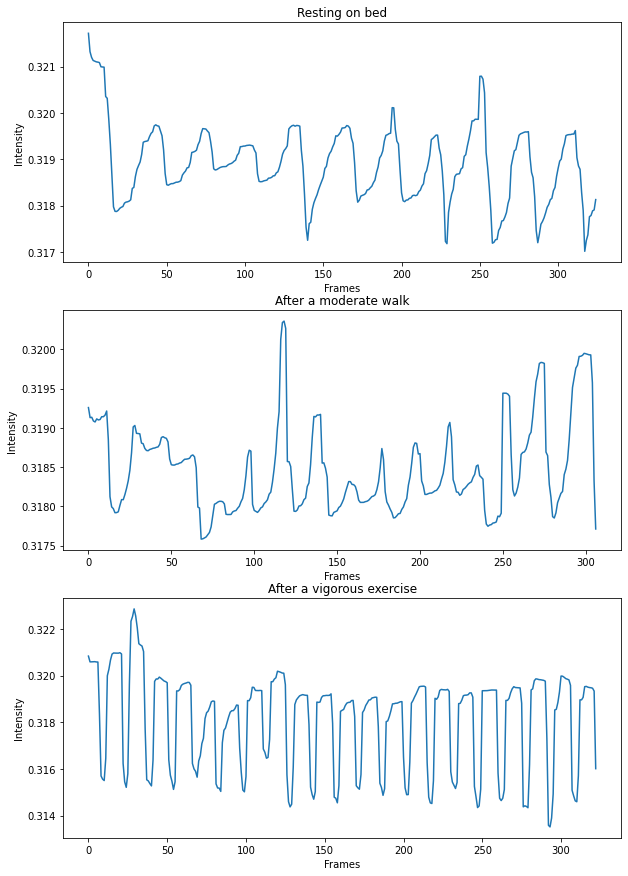

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(videoFrames_meanintensity["1"])
plt.title("Resting on bed")
plt.xlabel("Frames")
plt.ylabel("Intensity")

plt.subplot(3,1,2)
plt.plot(videoFrames_meanintensity["2"])
plt.title("After a moderate walk")
plt.xlabel("Frames")
plt.ylabel("Intensity")

plt.subplot(3,1,3)
plt.plot(videoFrames_meanintensity["3"])
plt.title("After a vigorous exercise")
plt.xlabel("Frames")
plt.ylabel("Intensity")
plt.show()

#### C. Temporal Variation of Intensity Value [10 points]
Plot your frame intensity metric vs. time for a random 5-second chunk of the three videos. The X-axis should be common for all three subplots (stacked vertically) with separate Y-axes based on your intensity metric. Appreciate the fact that vigorous exercise leads to rapid intensity variations compared to while resting. What is the BPM value for the three cases (manually counting is okay)?

In [72]:
import random
random.seed(360)
videoFrames_meanintensity_5sinterval = {"1":[], "2":[], "3":[]}
videoFrames_rgb = {"1b":[],"1g":[],"1r":[],"2b":[],"2g":[],"2r":[],"3b":[],"3g":[],"3r":[]}

r1 =random.randint(0,325-30*5)
for i in videoFrames["1"][r1:r1+30*5+1]:
  videoFrames_meanintensity_5sinterval["1"].append(i.reshape(1226880,1).mean())
  videoFrames_rgb["1b"].append(i.reshape(408960,3,1)[:,0].mean())
  videoFrames_rgb["1g"].append(i.reshape(408960,3,1)[:,1].mean())
  videoFrames_rgb["1r"].append(i.reshape(408960,3,1)[:,2].mean())

r2 =random.randint(0,307-29*5)
for i in videoFrames["2"][r2:r2+29*5+1]:
  videoFrames_meanintensity_5sinterval["2"].append(i.reshape(1238400,1).mean())
  videoFrames_rgb["2b"].append(i.reshape(412800,3,1)[:,0].mean())
  videoFrames_rgb["2g"].append(i.reshape(412800,3,1)[:,1].mean())
  videoFrames_rgb["2r"].append(i.reshape(412800,3,1)[:,2].mean())

r3 =random.randint(0,323-30*5)
for i in videoFrames["3"][r3:r3+30*5+1]:
  videoFrames_meanintensity_5sinterval["3"].append(i.reshape(1226880,1).mean())
  videoFrames_rgb["3b"].append(i.reshape(408960,3,1)[:,0].mean())
  videoFrames_rgb["3g"].append(i.reshape(408960,3,1)[:,1].mean())
  videoFrames_rgb["3r"].append(i.reshape(408960,3,1)[:,2].mean())

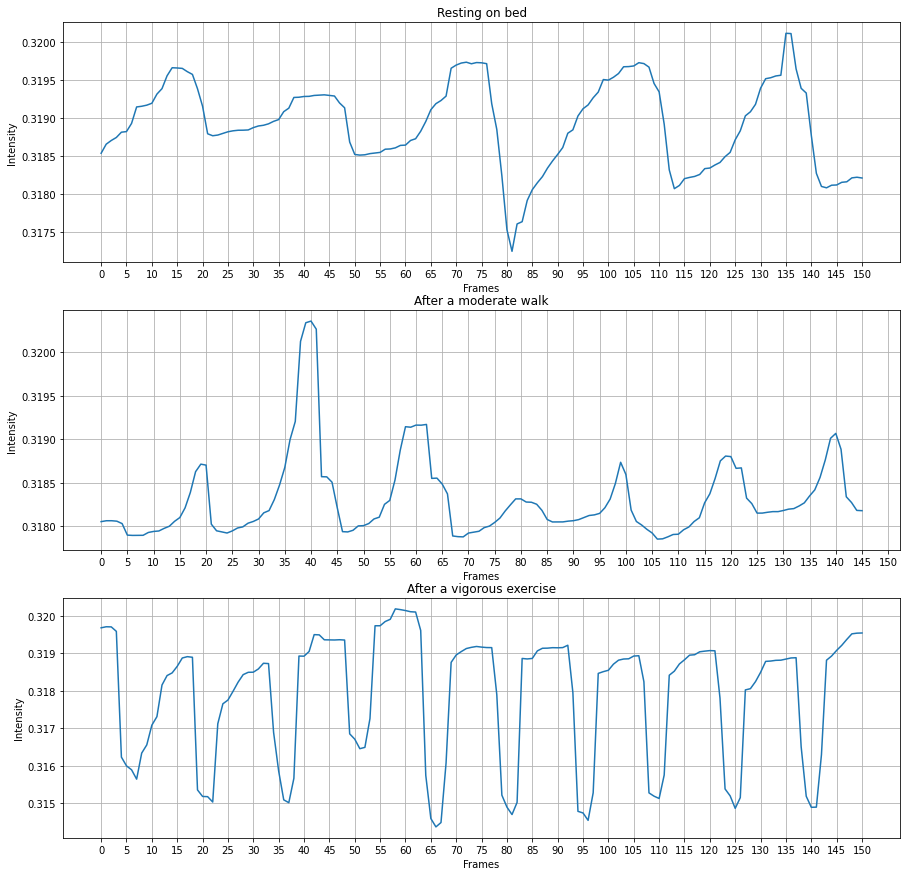

In [73]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(videoFrames_meanintensity_5sinterval["1"])
plt.title("Resting on bed")
plt.xlabel("Frames")
plt.ylabel("Intensity")
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150])
plt.grid()

plt.subplot(3,1,2)
plt.plot(videoFrames_meanintensity_5sinterval["2"])
plt.title("After a moderate walk")
plt.xlabel("Frames")
plt.ylabel("Intensity")
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150])
plt.grid()

plt.subplot(3,1,3)
plt.plot(videoFrames_meanintensity_5sinterval["3"])
plt.title("After a vigorous exercise")
plt.xlabel("Frames")
plt.ylabel("Intensity")
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150])
plt.grid()
plt.show()

**BPM measurement**

Case 1: Resting
5 peaks in 5 secs for 60 secs
5*12 = 60 bpm

Case 2: Walking
7 peaks in 5 secs for 60 secs
7*12 = 84 bpm

Case 3: Exercise
9 peaks in 5 secs for 60 secs
9*12 = 108 bpm


#### D. Likelihood Distributions [20 marks]
In the 5-second chunks taken above, choose 20 frames where your sensing metric is close to the local maximum (Case1), and 20 frames where it is close to the local minimum (Case2). Plot the histograms on "R", "G" and "B" values for each pixel in the 20 frames for the two cases 1 and 2. For each video there will be 3 figures, each for "R", "G" and "B". Which one produces the most separable distributions?

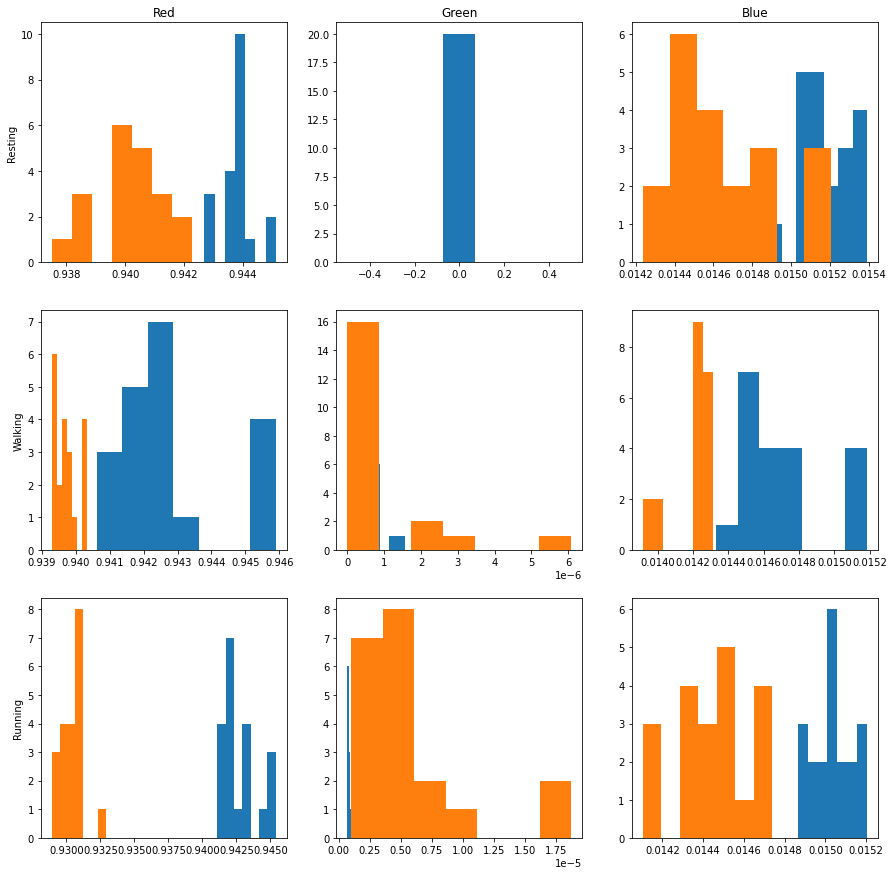

In [74]:
Frame1_maxima={"r":[],"b":[],"g":[]}
Frame1_minima={"r":[],"b":[],"g":[]}
maxima_1 = [14,15,16,17,134,135,136,137,70,71,72,73,74,104,105,106,107,40,41,42]
for i in range(150):
  if i in maxima_1:
    Frame1_maxima["r"].append(videoFrames_rgb["1r"][i])
    Frame1_maxima["g"].append(videoFrames_rgb["1g"][i])
    Frame1_maxima["b"].append(videoFrames_rgb["1b"][i])

minima_1 = [79,80,81,82,83,112,113,114,115,141,142,143,20,21,22,49,50,51,52,111]
for i in range(150):
  if i in minima_1:
    Frame1_minima["r"].append(videoFrames_rgb["1r"][i])
    Frame1_minima["g"].append(videoFrames_rgb["1g"][i])
    Frame1_minima["b"].append(videoFrames_rgb["1b"][i])

Frame2_maxima={"r":[],"b":[],"g":[]}
Frame2_minima={"r":[],"b":[],"g":[]}
maxima_2 = [37,38,39,40,41,59,60,61,62,98,99,100,80,139,140,141,118,119,120,121]
for i in range(150):
  if i in maxima_2:
    Frame2_maxima["r"].append(videoFrames_rgb["2r"][i])
    Frame2_maxima["g"].append(videoFrames_rgb["2g"][i])
    Frame2_maxima["b"].append(videoFrames_rgb["2b"][i])

minima_2 = [22,23,24,45,46,47,67,68,69,70,104,105,106,107,108,125,126,127,7,86]
for i in range(150):
  if i in minima_2:
    Frame2_minima["r"].append(videoFrames_rgb["2r"][i])
    Frame2_minima["g"].append(videoFrames_rgb["2g"][i])
    Frame2_minima["b"].append(videoFrames_rgb["2b"][i])

Frame3_maxima={"r":[],"b":[],"g":[]}
Frame3_minima={"r":[],"b":[],"g":[]}
maxima_3 = [57,58,59,60,42,43,44,45,15,16,17,116,117,118,131,132,133,90,72,73]
for i in range(150):
  if i in maxima_3:
    Frame3_maxima["r"].append(videoFrames_rgb["3r"][i])
    Frame3_maxima["g"].append(videoFrames_rgb["3g"][i])
    Frame3_maxima["b"].append(videoFrames_rgb["3b"][i])

minima_3 = [65,66,67,94,95,96,124,125,126,35,36,37,139,140,141,79,80,81,20,21]
for i in range(150):
  if i in minima_3:
    Frame3_minima["r"].append(videoFrames_rgb["3r"][i])
    Frame3_minima["g"].append(videoFrames_rgb["3g"][i])
    Frame3_minima["b"].append(videoFrames_rgb["3b"][i])

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title("Red")
plt.ylabel("Resting")
plt.hist(Frame1_maxima["r"],bins=7)
plt.hist(Frame1_minima["r"],bins=7)
plt.subplot(3,3,2)
plt.title("Green")
plt.hist(Frame1_maxima["g"],bins=7)
plt.hist(Frame1_minima["g"],bins=7)
plt.subplot(3,3,3)
plt.title("Blue")
plt.hist(Frame1_maxima["b"],bins=7)
plt.hist(Frame1_minima["b"],bins=7)

plt.subplot(3,3,4)
plt.hist(Frame2_maxima["r"],bins=7)
plt.hist(Frame2_minima["r"],bins=7)
plt.ylabel("Walking")
plt.subplot(3,3,5)
plt.hist(Frame2_maxima["g"],bins=7)
plt.hist(Frame2_minima["g"],bins=7)
plt.subplot(3,3,6)
plt.hist(Frame2_maxima["b"],bins=7)
plt.hist(Frame2_minima["b"],bins=7)

plt.subplot(3,3,7)
plt.hist(Frame3_maxima["r"],bins=7)
plt.hist(Frame3_minima["r"],bins=7)
plt.ylabel("Running")
plt.subplot(3,3,8)
plt.hist(Frame3_maxima["g"],bins=7)
plt.hist(Frame3_minima["g"],bins=7)
plt.subplot(3,3,9)
plt.hist(Frame3_maxima["b"],bins=7)
plt.hist(Frame3_minima["b"],bins=7)
plt.show()

"R" produces the most separable distributions

#### E. Threshold Based Detection and ROC curve [25 marks]
Only consider the "R" channel for analysis. Suppose, we just use a single pixel (uniformly randomly chosen in the frame) to detect whether the frame belongs to case 1 or case 2. You can denote the "Case 1" to be the POSITIVE event/hypothesis and "Case 2" to be the NEGATIVE event/null hypothesis. For every threshold value, for every frame, choose 500 random pixels. Compute the "Probability of Detection" ($P_D$) and "Probability of False Alarm" ($P_{FA}$). Note that you have (20 + 20) = 40 frames, and 500 detections per frame, i.e., 20000 total detections. Plot the $ROC$ curve. Which one has the best ROC curve (Dataset 1, 2 or 3)?

In [75]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

_1 = [14,15,16,17,134,135,136,137,70,71,72,73,74,104,105,106,107,40,41,42]
max_red_1 = []
x_max_red_1 = []
y_max_red_1 = []
for k in _1:
  for i in range(500):
    random.seed(i+100)
    x = random.randint(0,852)
    y = random.randint(0,479)
    x_max_red_1.append(x)
    y_max_red_1.append(y)
    max_red_1.append(videoFrames["1"][r1:r1+30*5+1][k][x][y][2])

_2 = [37,38,39,40,41,59,60,61,62,98,99,100,80,139,140,141,118,119,120,121]
x_max_red_2 = []
y_max_red_2 = []
max_red_2 = []
for k in _2:
  for i in range(500):
    random.seed(i+100)
    x = random.randint(0,851)
    y = random.randint(0,479)
    x_max_red_2.append(x)
    y_max_red_2.append(y)
    max_red_2.append(videoFrames["2"][r2:r2+29*5+1][k][x][y][2])

_3 = [57,58,59,60,42,43,44,45,15,16,17,116,117,118,131,132,133,90,72,73]
x_max_red_3 = []
y_max_red_3 = []
max_red_3 = []
for k in _3:
  for i in range(500):
    random.seed(i+100)
    x = random.randint(0,852)
    y = random.randint(0,479)
    x_max_red_3.append(x)
    y_max_red_3.append(y)
    max_red_3.append(videoFrames["3"][r3:r3+30*5+1][k][x][y][2])

_1 = [79,80,81,82,83,112,113,114,115,141,142,143,20,21,22,49,50,51,52,111]
x_min_red_1 = []
y_min_red_1 = []
min_red_1 = []
for k in _1:
  for i in range(500):
    random.seed(i+100)
    x = random.randint(0,852)
    y = random.randint(0,479)
    x_min_red_1.append(x)
    y_min_red_1.append(y)
    min_red_1.append(videoFrames["1"][r1:r1+30*5+1][k][x][y][2])

_2 = [22,23,24,45,46,47,67,68,69,70,104,105,106,107,108,125,126,127,7,86]
x_min_red_2 = []
y_min_red_2 = []
min_red_2 = []
for k in _2:
  for i in range(500):
    random.seed(i+100)
    x = random.randint(0,851)
    y = random.randint(0,479)
    x_min_red_2.append(x)
    y_min_red_2.append(y)
    min_red_2.append(videoFrames["2"][r2:r2+29*5+1][k][x][y][2])

_3 = [65,66,67,94,95,96,124,125,126,35,36,37,139,140,141,79,80,81,20,21]
x_min_red_3 = []
y_min_red_3 = []
min_red_3 = []
for k in _3:
  for i in range(500):
    random.seed(i+100)
    x = random.randint(0,852)
    y = random.randint(0,479)
    x_min_red_3.append(x)
    y_min_red_3.append(y)
    min_red_3.append(videoFrames["3"][r3:r3+30*5+1][k][x][y][2])

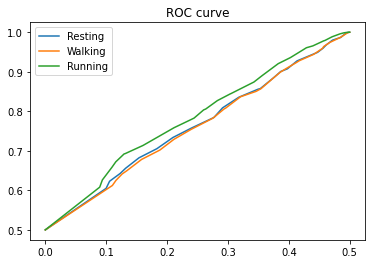

In [76]:
th = np.linspace(0,1,200)
pd_1 = []
pfa_1= []
for i in range(200):
  nm = 0
  nfa = 0
  for j in max_red_1:
    if (j<th[i]):
      nm = nm +1
  for j in min_red_1:
    if (j>th[i]):
      nfa =nfa +1
  pd_1.append(1-(nm/20000))
  pfa_1.append(nfa/20000)

pd_2 = []
pfa_2= []
for i in range(200):
  nm = 0
  nfa = 0
  for j in max_red_2:
    if (j<th[i]):
      nm = nm +1
  for j in min_red_2:
    if (j>th[i]):
      nfa =nfa +1
  pd_2.append(1-(nm/20000))
  pfa_2.append(nfa/20000)

pd_3 = []
pfa_3= []
for i in range(200):
  nm = 0
  nfa = 0
  for j in max_red_3:
    if (j<th[i]):
      nm = nm +1
  for j in min_red_3:
    if (j>th[i]):
      nfa =nfa +1
  pd_3.append(1-(nm/20000))
  pfa_3.append(nfa/20000)

plt.plot(pfa_1,pd_1)
plt.plot(pfa_2,pd_2)
plt.plot(pfa_3,pd_3)
plt.title("ROC curve")
plt.legend(['Resting','Walking', 'Running'])
plt.show()

Higher the ROC curve better the performance. As you can see from above the plots, Dataset 3 (Running) has the best ROC curve.

#### F. Are "good" samples spatially correlated? [20 marks]
First, choose an optimal threshold, $T_{OPT}$, that best suits your data (maximize $P_D$ while minimizing $P_{FA}$, you may look into maximizing the $\frac{P_D}{P_{FA}}$ ratio). Out of the 20000 total detections above for $T_{OPT}$, can it be hypothesised that the "good" samples (true positives and true negatives) are spatially clustered in certain areas of the frame, compared to the "bad" samples (false positives and false negatives)?

From the histograms, we can infer that at Topt = 0.9405 Pd is maximum and Pfa is minimum.

In [77]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

th = 0.9405

tp_1 = []
tn_1 = []
fp_1 = []
fn_1 = []

x_tp_1 = []
x_tn_1 = []
x_fp_1 = []
x_fn_1 = []

y_tp_1 = []
y_tn_1 = []
y_fp_1 = []
y_fn_1 = []

for i in range(len(max_red_1)):
  if max_red_1[i]>th:
    tp_1.append(max_red_1[i])
    x_tp_1.append(x_max_red_1[i])
    y_tp_1.append(y_max_red_1[i])

  if max_red_1[i]<th:
    fn_1.append(max_red_1[i])
    x_fn_1.append(x_max_red_1[i])
    y_fn_1.append(y_max_red_1[i])

for i in range(len(min_red_1)):
  if min_red_1[i]>th:
    fp_1.append(min_red_1[i])
    x_fp_1.append(x_min_red_1[i])
    y_fp_1.append(y_min_red_1[i])
  if min_red_1[i]<th:
    tn_1.append(min_red_1[i])
    x_tn_1.append(x_min_red_1[i])
    y_tn_1.append(y_min_red_1[i])

tp_2 = []
tn_2 = []
fp_2 = []
fn_2 = []

x_tp_2 = []
x_tn_2 = []
x_fp_2 = []
x_fn_2 = []

y_tp_2 = []
y_tn_2 = []
y_fp_2 = []
y_fn_2 = []

for i in range(len(max_red_2)):
  if max_red_2[i]>th:
    tp_2.append(max_red_2[i])
    x_tp_2.append(x_max_red_2[i])
    y_tp_2.append(y_max_red_2[i])

  if max_red_2[i]<th:
    fn_2.append(max_red_2[i])
    x_fn_2.append(x_max_red_2[i])
    y_fn_2.append(y_max_red_2[i])

for i in range(len(min_red_2)):
  if min_red_2[i]>th:
    fp_2.append(min_red_2[i])
    x_fp_2.append(x_min_red_2[i])
    y_fp_2.append(y_min_red_2[i])
  if min_red_2[i]<th:
    tn_2.append(min_red_2[i])
    x_tn_2.append(x_min_red_2[i])
    y_tn_2.append(y_min_red_2[i])

tp_3 = []
tn_3 = []
fp_3 = []
fn_3 = []

x_tp_3 = []
x_tn_3 = []
x_fp_3 = []
x_fn_3 = []

y_tp_3 = []
y_tn_3 = []
y_fp_3 = []
y_fn_3 = []

for i in range(len(max_red_3)):
  if max_red_3[i]>th:
    tp_3.append(max_red_3[i])
    x_tp_3.append(x_max_red_3[i])
    y_tp_3.append(y_max_red_3[i])

  if max_red_3[i]<th:
    fn_3.append(max_red_3[i])
    x_fn_3.append(x_max_red_3[i])
    y_fn_3.append(y_max_red_3[i])

for i in range(len(min_red_3)):
  if min_red_3[i]>th:
    fp_3.append(min_red_3[i])
    x_fp_3.append(x_min_red_3[i])
    y_fp_3.append(y_min_red_3[i])
  if min_red_3[i]<th:
    tn_3.append(min_red_3[i])
    x_tn_3.append(x_min_red_3[i])
    y_tn_3.append(y_min_red_3[i])



Text(0.5, 1.0, 'Running')

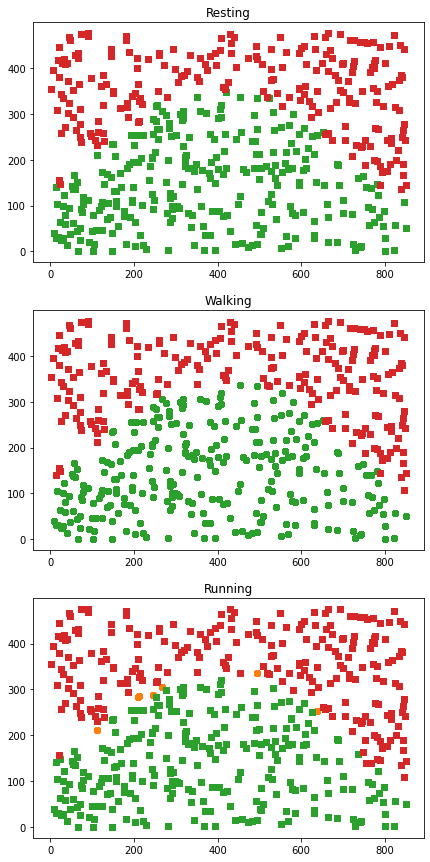

In [78]:
fig=plt.figure(figsize=(7,15))

plt.subplot(3,1,1)
plt.plot(x_tp_1,y_tp_1,"o")
plt.plot(x_tn_1,y_tn_1,"o")
plt.plot(x_fp_1,y_fp_1,"s")
plt.plot(x_fn_1,y_fn_1,"s")
plt.title("Resting")

plt.subplot(3,1,2)
plt.plot(x_tp_2,y_tp_2,"o")
plt.plot(x_tn_2,y_tn_2,"o")
plt.plot(x_fp_2,y_fp_2,"o")
plt.plot(x_fn_2,y_fn_2,"s")
plt.title("Walking")

plt.subplot(3,1,3)
plt.plot(x_tp_3,y_tp_3,"o")
plt.plot(x_tn_3,y_tn_3,"o")
plt.plot(x_fp_3,y_fp_3,"s")
plt.plot(x_fn_3,y_fn_3,"s")
plt.title("Running")

We can clearly see from the above plots that good samples and bad samples are spatially correlated. The good samples are concentrated at the centre and the bad samples are crowded at the corners. 

#### Submission (report document: 10 marks)
##### Deadline: $4^{th}$, March, 2023
* Compress the top level directory (ZIP format) containing this notebook with filled-in code along with the ppgvideos folder.
* Include a PDF file (10 marks) within the directory, name it "report.pdf". Mention your name and roll number.
* The report should contain explanations related to the above assignments (A through F), assumptions if any, specific code explanations, algorithms used and inferences made from the plots. Also include references if any.
* <b>You MUST not consult your homework code with others</b>. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.
* Submissions after the deadline will not be entertained.